In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skewnorm
import datetime as dt

# mile range of bounding box for finding stations to check thunder
mile_range=10
#constant value for determining thunderstorms above the average
thunder_over_avg=10
thunder_over_avg_ratio=1.5

#weighting function constants
# Parameters for the positively skewed distribution
a = 5  # Skewness parameter (positive for right/positive skew)
loc = -2  # Mean of the distribution
scale = 7  # Standard deviation
weight_min = -6 #days before landing to include 
weight_max = 21 #days after landing to include

#start and end dates for choosing file names of csv data
#start dates [1929,1970,1980,1990,2000,2010,2020]
start_dates_range=[1929,1970,1980,1990,2000,2010,2020]
#end dates[1969,1979,1989,1999,2009,2019,2025]
end_dates_range=[1969,1979,1989,1999,2009,2019,2025]

#read data of meteorite candidates and eliminate any that were not witnessed falls
candidate_data = pd.read_csv('Candidate Meteorite Details.csv')
candidate_data_fell=candidate_data[candidate_data['Observed y/n']=='y'].reset_index(drop=True)
candidate_data_fell['Datetime']=pd.to_datetime(candidate_data_fell['Date'])

#loop through candidates, load stations data, clean data, apply weighting function for thunderstorm proximity scoring
for index, row in candidate_data_fell.iterrows():
    #get the year the meteorite fell
    fell_date=row['Datetime']
    candidate_year_data=pd.read_csv(f'Weather_Data/{fell_date.year}_data.csv')
    candidate_year_data_prev=pd.DataFrame()
    candidate_year_data_next=pd.DataFrame()
    if (fell_date + dt.timedelta(days=weight_min)).year<fell_date.year:
        candidate_year_data_prev=pd.read_csv(f'Weather_data/{fell_date.year-1}')
    elif (fell_date + dt.timedelta(days=weight_max)).year>fell_date.year:
        candidate_year_data_next=pd.read_csv(f'Weather_data/{fell_date.year+1}')

    #load the weather data for the fall year with previous or next year depending on the weighting function requirements
    

    #remove all weather station data that is not pertinent to the meteorite

    #candidate_year_data[candidate_year_data['NAME']==row['Meteorite name']].reset_index(drop=True,inplace=True)
    #above is incorrect - it will need the stations associated with the meteorite and not the meteorite it self
    #also should probably recreate the dataframe through removing everything != a list of station names

    #append previous or next year data if required

    #create new column with the 'DATE' string converted to a pandas datetime variable
    candidate_year_data['Datetime']=pd.to_datetime(candidate_year_data['DATE'])

def proximity_score(thunder_data) -> float:
    '''uses weighting function to create a score for the meteorite based on thunderstorm
    date proximity to the meteorite landing'''

    #create weighting function
    global a, loc, scale, weight_min, weight_max
    x = np.linspace(weight_min, weight_max, weight_max-weight_min)
    y = skewnorm.pdf(x, a, loc, scale)



    



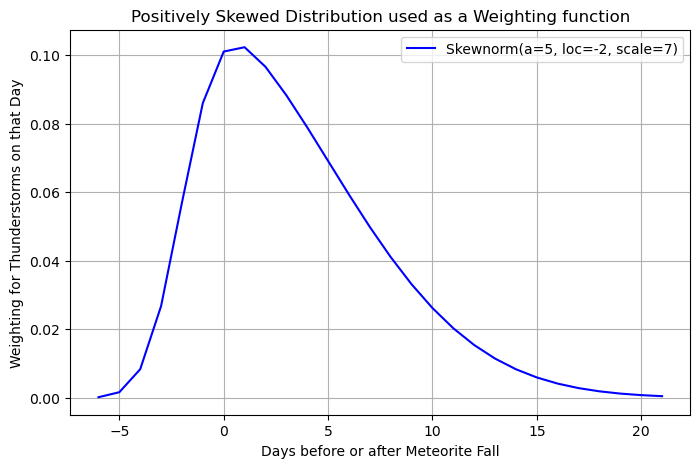

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

# Parameters for the skewed distribution
a = 5  # Skewness parameter (positive for right/positive skew)
loc = -2  # Mean of the distribution
scale = 7  # Standard deviation

# Generate data
x = np.linspace(-6, 21, 28)
y = skewnorm.pdf(x, a, loc, scale)

# Plot the distribution
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f'Skewnorm(a={a}, loc={loc}, scale={scale})', color='blue')
plt.title('Positively Skewed Distribution used as a Weighting function')
plt.xlabel('Days before or after Meteorite Fall')
plt.ylabel('Weighting for Thunderstorms on that Day')
plt.legend()
plt.grid()
plt.show()
